In [1]:
!pip install kagglehub pytorch_lightning torch

## Load dataset from Kaggle

In [6]:
from torchvision import transforms as T
from kagglehub import dataset_download

path = dataset_download("shubham1921/real-to-ghibli-image-dataset-5k-paired-images")
print("Path to dataset files:", path)

domain_a = f"{path}/dataset/trainA"
domain_b = f"{path}/dataset/trainB_ghibli"

Path to dataset files: /home/jovyan/.cache/kagglehub/datasets/shubham1921/real-to-ghibli-image-dataset-5k-paired-images/versions/1


## Convert the data into Lightning Modules

In [7]:
from data.dataset import UnpairedImageDataset
from data.datamodule import UnpairedDataModule

datamodule = UnpairedDataModule(
    domain_a_dir=domain_a,
    domain_b_dir=domain_b,
    batch_size=8,
    num_workers=4
)

datamodule.setup()

In [8]:
batch = next(iter(datamodule.train_dataloader()))
print("Domain A batch shape:", batch["a"].shape)
print("Domain B batch shape:", batch["b"].shape)

Domain A batch shape: torch.Size([8, 3, 256, 256])
Domain B batch shape: torch.Size([8, 3, 256, 256])


### Check resized image

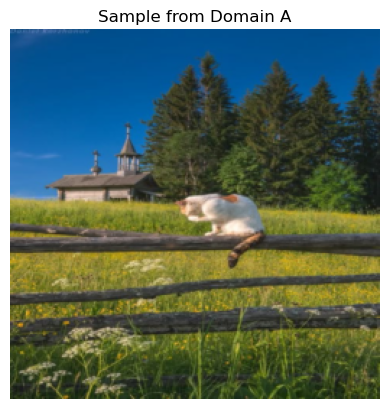

In [9]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

def denormalize(tensor):
    return tensor * 0.5 + 0.5 

img_tensor = batch["a"][0] 
img = denormalize(img_tensor).permute(1, 2, 0).numpy()  # [C,H,W] → [H,W,C]

plt.imshow(img)
plt.title("Sample from Domain A")
plt.axis("off")
plt.show()
